# Experiments for the Eikonal equation in a d-dimensional cube

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_cube import plot_2d_proj
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD
from PointSampling.Cube import data_gen_cube
from NeuralNetworks.NNs import FCFF_3L

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

In [2]:
# Dimension of the d-dimensional cube for each experiment
dim_list = 3*[5] + 3*[10]
# Number of neurons per hidden layer
n_list = [20, 30, 40] + [30, 40, 60]

n_experiments = len(dim_list)
side_length = 6.


# Parameters for each experiment
delta_list = [[.7, .3, .1]]*n_experiments
alpha_list = [[2.5, 1., .1]]*n_experiments
rounds = len(delta_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[80]*rounds]*n_experiments
num_iterations_list = [[1000]*(rounds-1) + [2000]]*n_experiments    

100%|██████████| 2000/2000 [00:03<00:00, 607.86it/s]


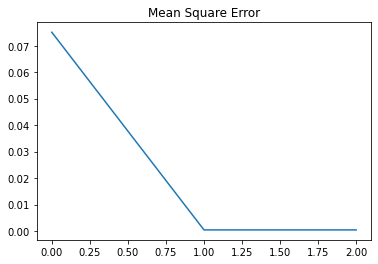

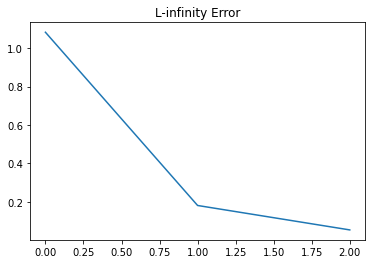

/Users/carlosesteveyague/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666647174771/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


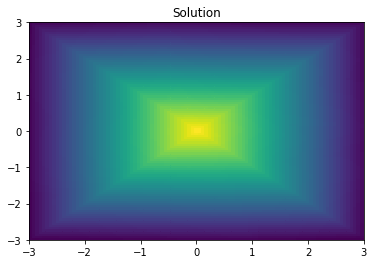

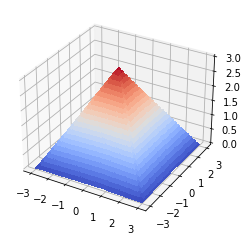

100%|██████████| 2000/2000 [00:03<00:00, 519.40it/s]


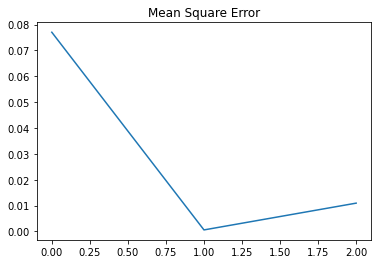

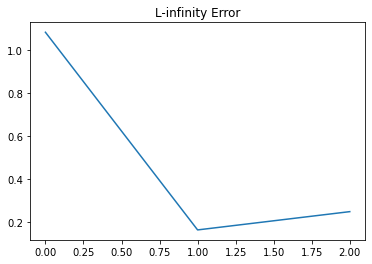

../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


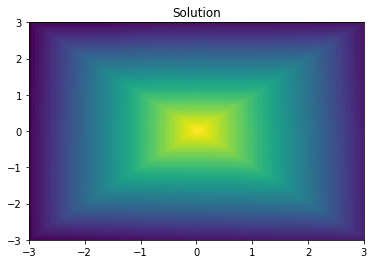

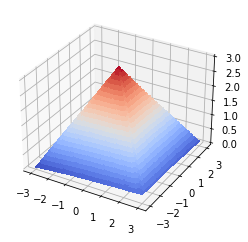

100%|██████████| 2000/2000 [00:04<00:00, 484.88it/s]


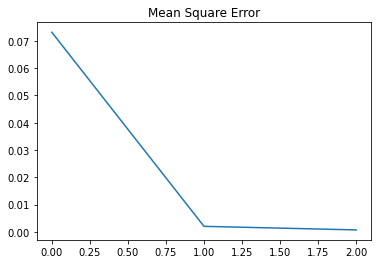

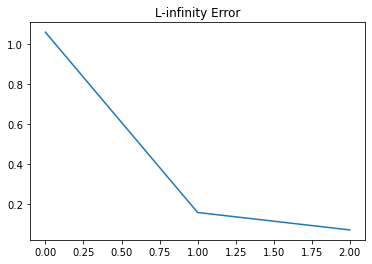

../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


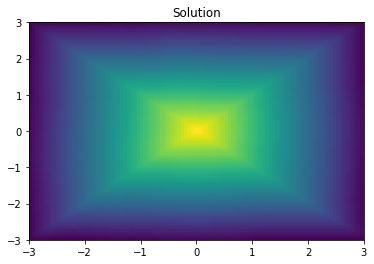

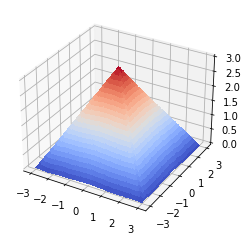

100%|██████████| 2000/2000 [00:04<00:00, 462.37it/s]


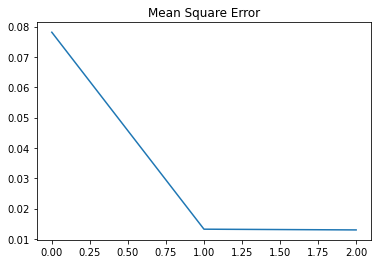

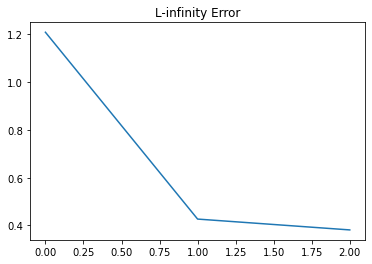

../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


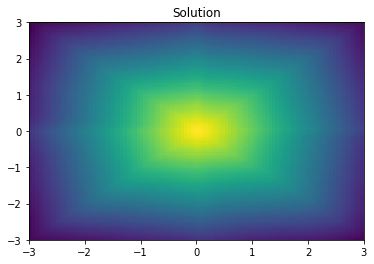

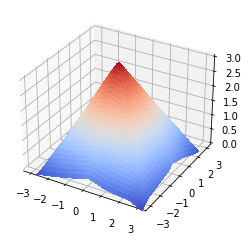

100%|██████████| 2000/2000 [00:04<00:00, 404.09it/s]


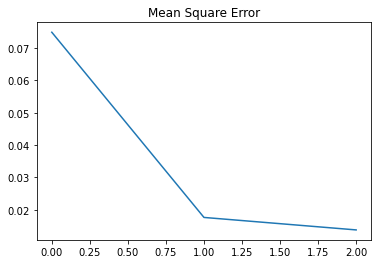

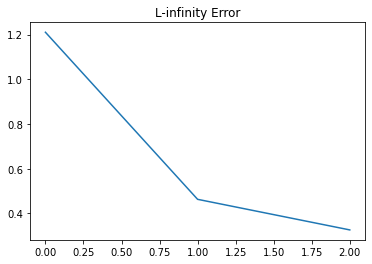

../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


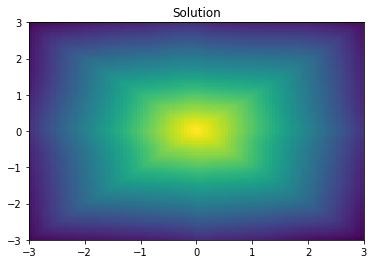

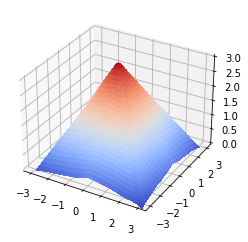

100%|██████████| 2000/2000 [00:05<00:00, 346.60it/s]


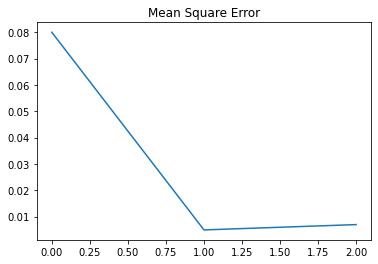

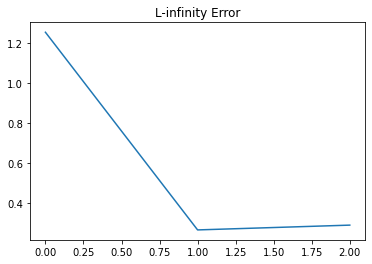

../visualization/plots_cube.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(GridX.detach(), GridY.detach(), V.detach())


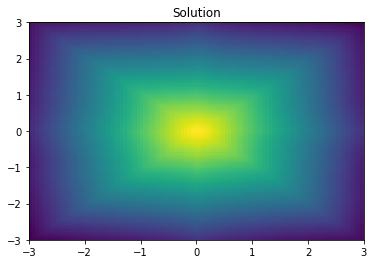

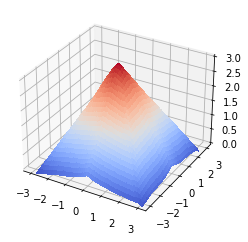

In [3]:
from Training.training import train
from error_test.cube_error import error_cube

MSE_history = torch.zeros([n_experiments, rounds])
L_inf_error_history = torch.zeros([n_experiments, rounds])
run_times = torch.zeros([n_experiments])


for j in range(n_experiments):
    t0 = t()

    
    domain = data_gen_cube(side_length, dim_list[j])
    NN = FCFF_3L([dim_list[j]] + 2*[n_list[j]])    
    training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)
    
    for i in range(rounds):
    
        training_params['alpha'] = alpha_list[j][i]
        training_params['delta'] = delta_list[j][i]
        
        training_params['n_coloc_points'] = N_col_list[j][i]
        training_params['n_boundary_points'] = N_b_list[j][i]
        training_params['num_iterations'] = num_iterations_list[j][i]
        
        total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
        
        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_cube(NN, side_length, MC_points)
        
        MSE_history[j,i] = MSE
        L_inf_error_history[j,i] = L_inf
    
    run_times[j] = t() - t0
    
    plt.plot(MSE_history[j])
    plt.title('Mean Square Error')
    plt.show()
    
    plt.plot(L_inf_error_history[j])
    plt.title('L-infinity Error')
    plt.show()
    
    X_axis = 0
    Y_axis = 1

    plot_2d_proj(X_axis, Y_axis, NN, 100, side_length)


In [4]:
import pandas as pd
import numpy as np

sampling_sizes = pd.DataFrame({'Neurons/Layer': n_experiments,
                               'N': N_col_list,
                               'N_b': N_b_list})
run_T = pd.DataFrame({'Run Times': np.array(run_times)})

results_MSE = pd.DataFrame(np.array(MSE_history), columns = ['Round 1', 'Round 2', 'Round 3'])
results_Linf = pd.DataFrame(np.array(L_inf_error_history) , columns = ['Round 1', 'Round 2', 'Round 3'])


display(sampling_sizes.join(results_MSE).join(run_T))
display(sampling_sizes.join(results_Linf).join(run_T))

,Neurons/Layer,N,N_b,Round 1,Round 2,Round 3,Run Times
0,6,"[200, 200, 200]","[80, 80, 80]",0.075085,0.000408,0.000405,7.442461
1,6,"[200, 200, 200]","[80, 80, 80]",0.077044,0.000578,0.010936,8.037478
2,6,"[200, 200, 200]","[80, 80, 80]",0.073086,0.002065,0.000754,8.360282
3,6,"[200, 200, 200]","[80, 80, 80]",0.078125,0.013206,0.012966,8.996616
4,6,"[200, 200, 200]","[80, 80, 80]",0.074873,0.017643,0.013787,10.197351
5,6,"[200, 200, 200]","[80, 80, 80]",0.080011,0.004949,0.006967,11.674389


,Neurons/Layer,N,N_b,Round 1,Round 2,Round 3,Run Times
0,6,"[200, 200, 200]","[80, 80, 80]",1.082473,0.180991,0.053835,7.442461
1,6,"[200, 200, 200]","[80, 80, 80]",1.084337,0.161641,0.246962,8.037478
2,6,"[200, 200, 200]","[80, 80, 80]",1.059890,0.159491,0.072358,8.360282
3,6,"[200, 200, 200]","[80, 80, 80]",1.208755,0.426689,0.381317,8.996616
4,6,"[200, 200, 200]","[80, 80, 80]",1.210702,0.463129,0.326242,10.197351
5,6,"[200, 200, 200]","[80, 80, 80]",1.255946,0.264005,0.288032,11.674389


In [5]:
display(sampling_sizes.join(results_MSE).join(run_T).to_latex())

display(sampling_sizes.join(results_Linf).join(run_T).to_latex())

'\\begin{tabular}{lrllrrrr}\n\\toprule\n{} &  Neurons/Layer &                N &           N\\_b &   Round 1 &   Round 2 &   Round 3 &  Run Times \\\\\n\\midrule\n0 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.075085 &  0.000408 &  0.000405 &   7.442461 \\\\\n1 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.077044 &  0.000578 &  0.010936 &   8.037478 \\\\\n2 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.073086 &  0.002065 &  0.000754 &   8.360282 \\\\\n3 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.078125 &  0.013206 &  0.012966 &   8.996616 \\\\\n4 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.074873 &  0.017643 &  0.013787 &  10.197351 \\\\\n5 &              6 &  [200, 200, 200] &  [80, 80, 80] &  0.080011 &  0.004949 &  0.006967 &  11.674389 \\\\\n\\bottomrule\n\\end{tabular}\n'

'\\begin{tabular}{lrllrrrr}\n\\toprule\n{} &  Neurons/Layer &                N &           N\\_b &   Round 1 &   Round 2 &   Round 3 &  Run Times \\\\\n\\midrule\n0 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.082473 &  0.180991 &  0.053835 &   7.442461 \\\\\n1 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.084337 &  0.161641 &  0.246962 &   8.037478 \\\\\n2 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.059890 &  0.159491 &  0.072358 &   8.360282 \\\\\n3 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.208755 &  0.426689 &  0.381317 &   8.996616 \\\\\n4 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.210702 &  0.463129 &  0.326242 &  10.197351 \\\\\n5 &              6 &  [200, 200, 200] &  [80, 80, 80] &  1.255946 &  0.264005 &  0.288032 &  11.674389 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
NN

FCFF_3L(
  (L1): Linear(in_features=3, out_features=60, bias=True)
  (L2): Linear(in_features=60, out_features=60, bias=True)
  (L3): Linear(in_features=60, out_features=1, bias=True)
)